In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [2]:
df = pd.read_csv("Datasets/MNIST/train.csv")
print(df.shape)

(35997, 785)


In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(35997, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:] # For all rows, all columns after 1st column
Y = data[:,0] # For all rows, first column

In [7]:
print(X.shape, Y.shape)

(35997, 784) (35997,)


In [8]:
# Train-Test Split
split = int(0.98 * X.shape[0]) # Because testing takes lots of time

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(35277, 784) (35277,)
(720, 784) (720,)


In [9]:
## Visualize
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

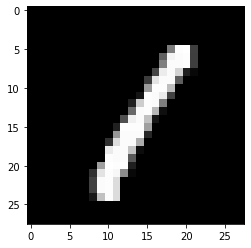

Label ->  1


In [10]:
drawImg(X_train[3])
print("Label -> ", Y_train[3])

### Step 2. KNN

In [11]:
# We have 784 dimensions/features

def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

# KNN Function
def knn(X, Y, queryPoint, k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    # Nearest / First K Points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    max_freq_index = new_vals[1].argmax()
    
    pred = new_vals[0][max_freq_index]
    
    return pred    

### Step 3. Make Predictions

In [12]:
pred = knn(X_train, Y_train, X_test[0])
print(int(pred))

0


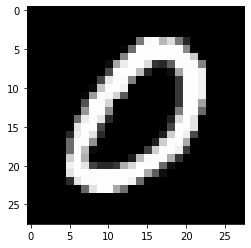

0


In [13]:
drawImg(X_test[0])
print(Y_test[0])

In [14]:
# Method to Compute The Accuracy of KNN Over Test Set

def accuracy(X_train, Y_train, X_test, Y_test):
    total_sample = len(Y_test)
    print("Total Test Samples : ", total_sample)
    correct_pred = 0
    count = 0
    for i in range(total_sample):
        count += 1
        if(int(knn(X_train, Y_train, X_test[i])) == Y_test[i]):
            correct_pred+=1
        if(count % 10 == 0):
            print("Samples Checked : ", i+1)
            print("Correct So Far  : ", correct_pred)
            
    return float((correct_pred/total_sample)*100)

# Testing for 20 Samples
print(accuracy(X_train, Y_train, X_test[:20], Y_test[:20]))

Total Test Samples :  20
Samples Checked :  10
Correct So Far  :  10
Samples Checked :  20
Correct So Far  :  20
100.0
